In [1]:
import numpy as np
from connect_four import Game, GameType

In [2]:
game_init = np.array(
    [
        [2, 2, 2, 1, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 2, 2, 2, 0, 1, 0],
        [2, 1, 1, 1, 0, 2, 0],
        [1, 1, 1, 2, 0, 2, 0],
        [2, 2, 1, 2, 0, 1, 0],
    ]
)

In [3]:
game = Game(game_init)

Running tree search to choose action ...
Qvalues: {np.int64(4): 0.7039848197343453, np.int64(6): 0.690978886756238}
Choosing 4


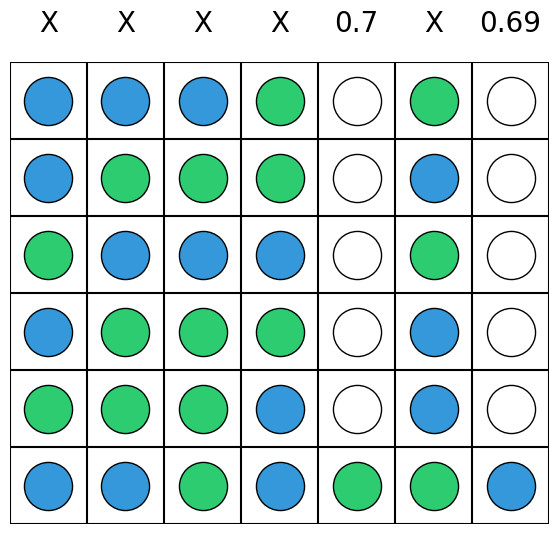

Running tree search to choose action ...
Qvalues: {np.int64(4): 0.7128378378378378, np.int64(6): 0.3991228070175439}
Choosing 4


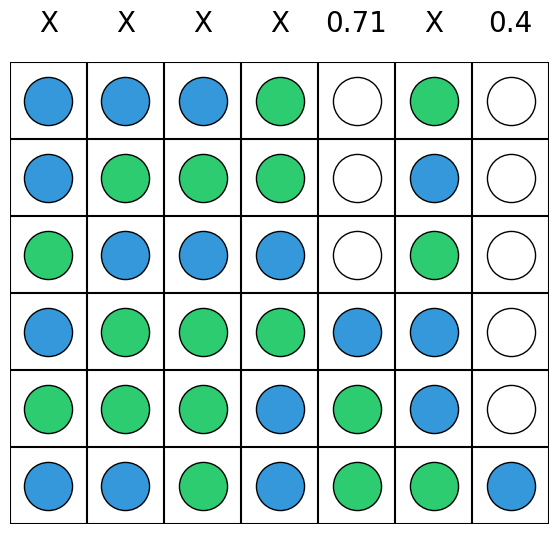

The winner of the game is: 2


In [4]:
game.play()